In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
from keras.datasets import mnist #Just to import the MNIST data set

In [8]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [9]:
print(train_X.shape, test_X.shape, train_y.shape) #Images of 28*28 pixels

(60000, 28, 28) (10000, 28, 28) (60000,)


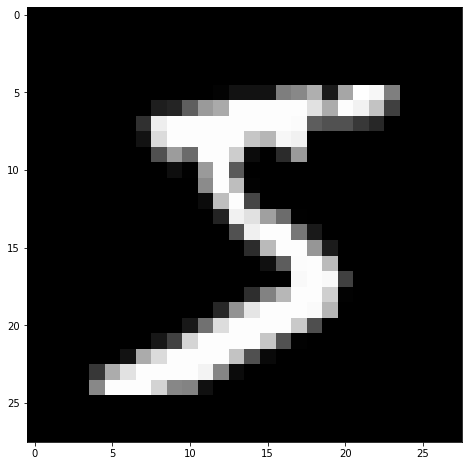

In [10]:
def plot_image(index):
    plt.figure(figsize = (8,8))
    plt.imshow(train_X[index,:,:], cmap='gray')
    plt.show()

plot_image(0)

In [11]:
train_X = train_X.reshape(60000, 28*28)
test_X = test_X.reshape(10000, 28*28)
print(train_X.shape, test_X.shape)

(60000, 784) (10000, 784)


In [12]:
train_X = (train_X.astype(float)).T /255
test_X = (test_X.astype(float)).T /255

In [13]:
#train_X[:,0]

In [14]:
print(train_y.shape, train_X.shape)

(60000,) (784, 60000)


In [15]:
#Initiallizing weights, random with normal distribution.  
def init_param():
    W1 = np.random.randn(20, 784)
    W2 = np.random.randn(10,20)
    B1 = np.random.randn(20, 1)
    B2 = np.random.randn(10, 1)
    return W1, B1, W2, B2

In [16]:
##Activation functions relu for first hidden layer, second one for the output layer.
def relu(X):
    return np.maximum(0, X)

def relu_der(Z):
    return (Z > 0).astype(float)

In [17]:
def forward(W1,B1,W2,B2,X):
    #print(X)
    Z1 = np.dot(W1,X.reshape(-1, 1)) + B1
    #print(Z1)
    A1 = relu(Z1)
    Z2 = np.dot(W2,A1) + B2
    #print(Z2)
    A2 = softmax(Z2)
    #print(A2)
    return Z1, A1, Z2, A2

In [18]:
def softmax(X):
    exp_X = np.exp(X) 
    return exp_X / sum(np.exp(X))

def softmax_der(X):
    softmax_X = softmax(X)
    diag_softmax_X = np.diag(softmax_X)
    softmax_derivative = diag_softmax_X - np.outer(softmax_X, softmax_X)
    return softmax_derivative
#No need for the derivative since it is considered in the backpropagation base_1

In [19]:
#Loss function and the derivative Categorical Crossentropy loss, implicit in the backpropagation base_1

def categorical_crossentropy_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon) # Avoid division by zero
    loss = -np.sum(y_true * np.log(y_pred)) / len(y_true)
    return loss

def cat_cross_loss_der(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    derivative = -y_true / y_pred
    
    return derivative

In [20]:
#Loss function and the derivative Mean square error loss, not used for this problem. 

def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2))

def mse_der(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size

In [21]:
def gradient_descent(W1, B1, W2, B2, dW1, dW2, dB1, dB2, alpha):
    W1 = W1 - alpha*dW1
    B1 = B1 - alpha*dB1
    W2 = W2 - alpha*dW2
    B2 = B2 - alpha*dB2
    return W1, B1, W2, B2

In [22]:
def one_hot(index, num_classes=10):
    one_hot_encoded = np.eye(num_classes)[index]
    return one_hot_encoded

In [23]:
ejem = one_hot(4)
(ejem.reshape(-1, 1)).shape

(10, 1)

In [24]:
def back_prop(Z2, A2, Z1, A1, W2, B2, X, Y):
    Y_vec = one_hot(Y)
    base_1 = A2 - Y_vec.reshape(-1, 1) #Z2 - Y
    dW2 = np.dot(base_1,A1.T) #base_1, Z1.T
    dB2 = base_1
    
    base_2 = np.dot(W2.T,base_1)*relu_der(Z1)
    dW1 = np.dot(base_2,X.reshape(-1, 1).T)
    dB1 = base_2
    return dW1, dB1, dW2, dB2
    

In [25]:
def get_pred(X, W1, B1, W2, B2):
    Z1, A1, Z2, A2 = forward(W1,B1,W2,B2,X)
    #print(A2)
    return np.argmax(A2, 0)

In [26]:
def get_acc(pred, target):
    return np.sum(pred == target)/target.size

In [70]:
def train(X, Y, epochs, alpha):
    _,m = train_X.shape
    W1, B1, W2, B2 = init_param()
    for i in range(epochs):
        k = 0
        pred = []
        for j in range(m):
            Z1, A1, Z2, A2 = forward(W1, B1, W2, B2, X[:,j])
            dW1, dB1, dW2, dB2 = back_prop(Z2, A2, Z1, A1, W2, B2, X[:,j], Y[j])
            W1, B1, W2, B2 = gradient_descent(W1, B1, W2, B2, dW1, dW2, dB1, dB2, alpha)
            prediction = get_pred(X[:,j], W1, B1, W2, B2)[0]
            pred.append(prediction)
        accuracy = get_acc(pred, Y)
        if (i % 2 == 0):
            print("Iteration: ", i)
            print("Accuracy: ", accuracy)
            print("First 10 predictions: ", pred[0:10])
    return W1, B1, W2, B2

In [71]:
W1, B1, W2, B2 = train(train_X, train_y, 10, 0.01)

Iteration:  0
Accuracy:  0.8141833333333334
First 10 predictions:  [1, 0, 1, 0, 0, 2, 1, 3, 7, 2]
Iteration:  2
Accuracy:  0.9431166666666667
First 10 predictions:  [5, 0, 4, 1, 9, 2, 1, 3, 1, 4]
Iteration:  4
Accuracy:  0.9578666666666666
First 10 predictions:  [5, 0, 4, 1, 9, 2, 1, 3, 1, 4]
Iteration:  6
Accuracy:  0.9638333333333333
First 10 predictions:  [5, 0, 4, 1, 9, 2, 1, 3, 1, 4]
Iteration:  8
Accuracy:  0.9673166666666667
First 10 predictions:  [5, 0, 4, 1, 9, 2, 1, 3, 1, 4]


In [73]:
#Prediction Example
prediction = get_pred(train_X[:,1],W1, B1, W2, B2)
print(type(prediction), prediction)

<class 'numpy.ndarray'> [0]


In [74]:
final_pred = []
for i in range(len(train_y)):
    final_pred.append(get_pred(train_X[:,i],W1,B1,W2,B2)[0])

accuracy = get_acc(final_pred, train_y)

In [75]:
print("Final accuracy on train data: ", accuracy)

Final accuracy on train data:  0.9147166666666666


In [76]:
final_pred[0:20]
print(len(train_y))

60000


In [77]:
#Predictions for Test Data
final_pred_test = []
for i in range(len(test_y)):
    final_pred_test.append(get_pred(test_X[:,i],W1,B1,W2,B2)[0])

accuracy_test = get_acc(final_pred_test, test_y)

In [78]:
print("Final accuracy on test data: ", accuracy_test)

Final accuracy on test data:  0.9134


In [83]:
def plot_pred(index):
    image = (test_X[:,index].reshape((28,28)))*255
    print("Prediction: ", final_pred_test[index])
    print("Target: ", test_y[index])
    #image
    plt.figure(figsize = (8,8))
    plt.imshow(image, cmap='gray')
    plt.show()
    

Prediction:  7
Target:  7


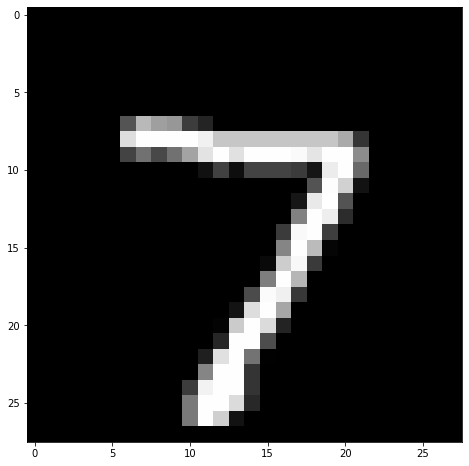

In [84]:
plot_pred(0)

Prediction:  8
Target:  3


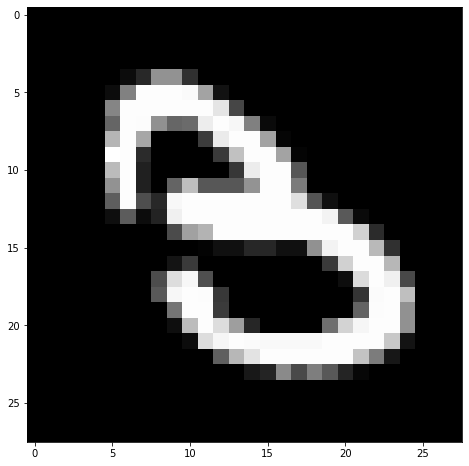

Prediction:  6
Target:  4


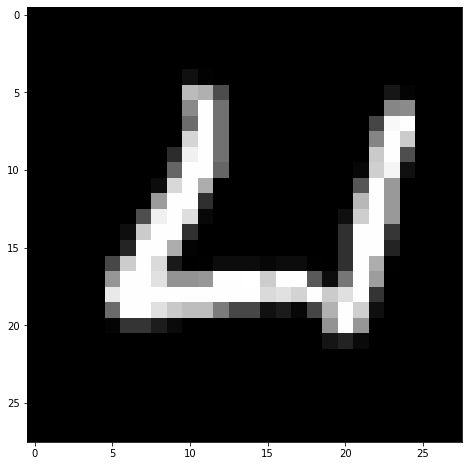

Prediction:  3
Target:  2


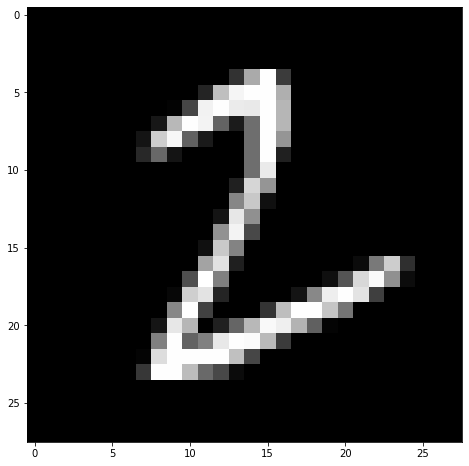

In [42]:
wrong_pred = np.where(final_pred_test != test_y)[0]
for i in range(3):
    plot_pred(wrong_pred[i])

In [44]:
#Reference: 
#Aflak, O. (2018, November 14). Neural Network from scratch in Python. Towards Data Science. https://towardsdatascience.com/math-neural-network-from-scratch-in-python-d6da9f29ce65

In [45]:
##Neural Network using Keras model 

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [47]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images_flat = train_images.reshape((train_images.shape[0], -1)) / 255.0
test_images_flat = test_images.reshape((test_images.shape[0], -1)) / 255.0

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(test_labels.shape)

(10000, 10)


In [48]:
#Almost same NN but with categorical_crossentropy cost function, and adam optimizer
model = Sequential()
model.add(Dense(784, input_shape=(784,), activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 20)                15700     
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 631,350
Trainable params: 631,350
Non-trainable params: 0
_________________________________________________________________


In [49]:
epochs = 10
batch_size = 32
history = model.fit(train_images_flat, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.2)
train_loss, train_accuracy = model.evaluate(train_images_flat, train_labels)

Epoch 1/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2227 - accuracy: 0.9354 - val_loss: 0.1259 - val_accuracy: 0.9620
Epoch 2/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0906 - accuracy: 0.9719 - val_loss: 0.1038 - val_accuracy: 0.9693
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0612 - accuracy: 0.9805 - val_loss: 0.0914 - val_accuracy: 0.9733
Epoch 4/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0427 - accuracy: 0.9865 - val_loss: 0.0828 - val_accuracy: 0.9762
Epoch 5/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0330 - accuracy: 0.9896 - val_loss: 0.0961 - val_accuracy: 0.9750
Epoch 6/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0269 - accuracy: 0.9914 - val_loss: 0.1056 - val_accuracy: 0.9749
Epoch 7/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0213 - accuracy: 0.9927 - val_loss: 0.0990 - val_accur

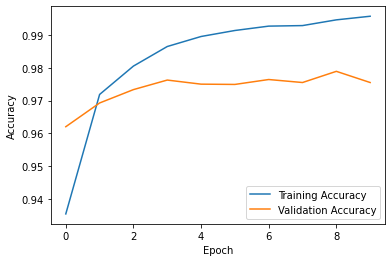

In [50]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [52]:
##Final accuracy on test data
predictions_keras_model = model.predict(test_images_flat)
accuracy_keras_model = np.mean(np.argmax(predictions_keras_model, axis=1) == np.argmax(test_labels, axis=1))

313/313 [==============================] - 1s 3ms/step


In [56]:
print("Prediction Keras model on test data: ", accuracy_keras_model)

Prediction Keras model on test data:  0.9786
